In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.shape

(7385, 12)

In [4]:
def transmission_type(value):
    if isinstance(value, str):
        tt = ''
        for char in value:
            if char.isalpha():
                tt += char
            else:
                break
        if tt:
            return tt
        else:
            return None
        
        
def number_of_gears(value):
    if isinstance(value, str):
        nog = ''
        for char in value[::-1]:
            if char.isdigit():
                nog = char + nog
            else:
                break
        if nog:
            return nog
        else:
            return None
        
        
df['Transmission_Type'] = df['Transmission'].apply(transmission_type)
df['Number_of_Gears'] = df['Transmission'].apply(number_of_gears)

In [5]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_Type,Number_of_Gears
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,AS,5
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,M,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,AV,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,AS,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,AS,6


In [6]:
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns].nunique()

Make                   42
Model                2053
Vehicle Class          16
Transmission           27
Fuel Type               5
Transmission_Type       5
Number_of_Gears         7
dtype: int64

In [7]:
df.drop(columns=['Model', 'Transmission'], inplace=True)
df.rename(columns={'Make' : 'Vehicle Brand'}, inplace=True)
df.columns = df.columns.str.replace(' ', '_')

In [8]:
df.head()

,Vehicle_Brand,Vehicle_Class,Engine_Size(L),Cylinders,Fuel_Type,Fuel_Consumption_City_(L/100_km),Fuel_Consumption_Hwy_(L/100_km),Fuel_Consumption_Comb_(L/100_km),Fuel_Consumption_Comb_(mpg),CO2_Emissions(g/km),Transmission_Type,Number_of_Gears
0,ACURA,COMPACT,2.0,4,Z,9.9,6.7,8.5,33,196,AS,5
1,ACURA,COMPACT,2.4,4,Z,11.2,7.7,9.6,29,221,M,6
2,ACURA,COMPACT,1.5,4,Z,6.0,5.8,5.9,48,136,AV,7
3,ACURA,SUV - SMALL,3.5,6,Z,12.7,9.1,11.1,25,255,AS,6
4,ACURA,SUV - SMALL,3.5,6,Z,12.1,8.7,10.6,27,244,AS,6


In [9]:
df.shape

(7385, 12)

In [10]:
df.isnull().sum()

Vehicle_Brand                         0
Vehicle_Class                         0
Engine_Size(L)                        0
Cylinders                             0
Fuel_Type                             0
Fuel_Consumption_City_(L/100_km)      0
Fuel_Consumption_Hwy_(L/100_km)       0
Fuel_Consumption_Comb_(L/100_km)      0
Fuel_Consumption_Comb_(mpg)           0
CO2_Emissions(g/km)                   0
Transmission_Type                     0
Number_of_Gears                     295
dtype: int64

In [11]:
mode_value = df['Number_of_Gears'].mode()[0]
df.fillna({'Number_of_Gears' : mode_value}, inplace=True)

In [12]:
df.isnull().sum()

Vehicle_Brand                       0
Vehicle_Class                       0
Engine_Size(L)                      0
Cylinders                           0
Fuel_Type                           0
Fuel_Consumption_City_(L/100_km)    0
Fuel_Consumption_Hwy_(L/100_km)     0
Fuel_Consumption_Comb_(L/100_km)    0
Fuel_Consumption_Comb_(mpg)         0
CO2_Emissions(g/km)                 0
Transmission_Type                   0
Number_of_Gears                     0
dtype: int64

In [13]:
df.dtypes

Vehicle_Brand                        object
Vehicle_Class                        object
Engine_Size(L)                      float64
Cylinders                             int64
Fuel_Type                            object
Fuel_Consumption_City_(L/100_km)    float64
Fuel_Consumption_Hwy_(L/100_km)     float64
Fuel_Consumption_Comb_(L/100_km)    float64
Fuel_Consumption_Comb_(mpg)           int64
CO2_Emissions(g/km)                   int64
Transmission_Type                    object
Number_of_Gears                      object
dtype: object

In [14]:
df['Number_of_Gears'] = df['Number_of_Gears'].astype('int64')

In [15]:
df.dtypes

Vehicle_Brand                        object
Vehicle_Class                        object
Engine_Size(L)                      float64
Cylinders                             int64
Fuel_Type                            object
Fuel_Consumption_City_(L/100_km)    float64
Fuel_Consumption_Hwy_(L/100_km)     float64
Fuel_Consumption_Comb_(L/100_km)    float64
Fuel_Consumption_Comb_(mpg)           int64
CO2_Emissions(g/km)                   int64
Transmission_Type                    object
Number_of_Gears                       int64
dtype: object

In [16]:
df.duplicated().sum()

2173

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(5212, 12)

In [19]:
df['CO2_Emissions(g/km)'] = df.pop('CO2_Emissions(g/km)')

In [20]:
df.head()

,Vehicle_Brand,Vehicle_Class,Engine_Size(L),Cylinders,Fuel_Type,Fuel_Consumption_City_(L/100_km),Fuel_Consumption_Hwy_(L/100_km),Fuel_Consumption_Comb_(L/100_km),Fuel_Consumption_Comb_(mpg),Transmission_Type,Number_of_Gears,CO2_Emissions(g/km)
0,ACURA,COMPACT,2.0,4,Z,9.9,6.7,8.5,33,AS,5,196
1,ACURA,COMPACT,2.4,4,Z,11.2,7.7,9.6,29,M,6,221
2,ACURA,COMPACT,1.5,4,Z,6.0,5.8,5.9,48,AV,7,136
3,ACURA,SUV - SMALL,3.5,6,Z,12.7,9.1,11.1,25,AS,6,255
4,ACURA,SUV - SMALL,3.5,6,Z,12.1,8.7,10.6,27,AS,6,244


In [21]:
numerical_columns = df.select_dtypes(include='number').columns[:-1]

n_rows = 2
n_cols = 4

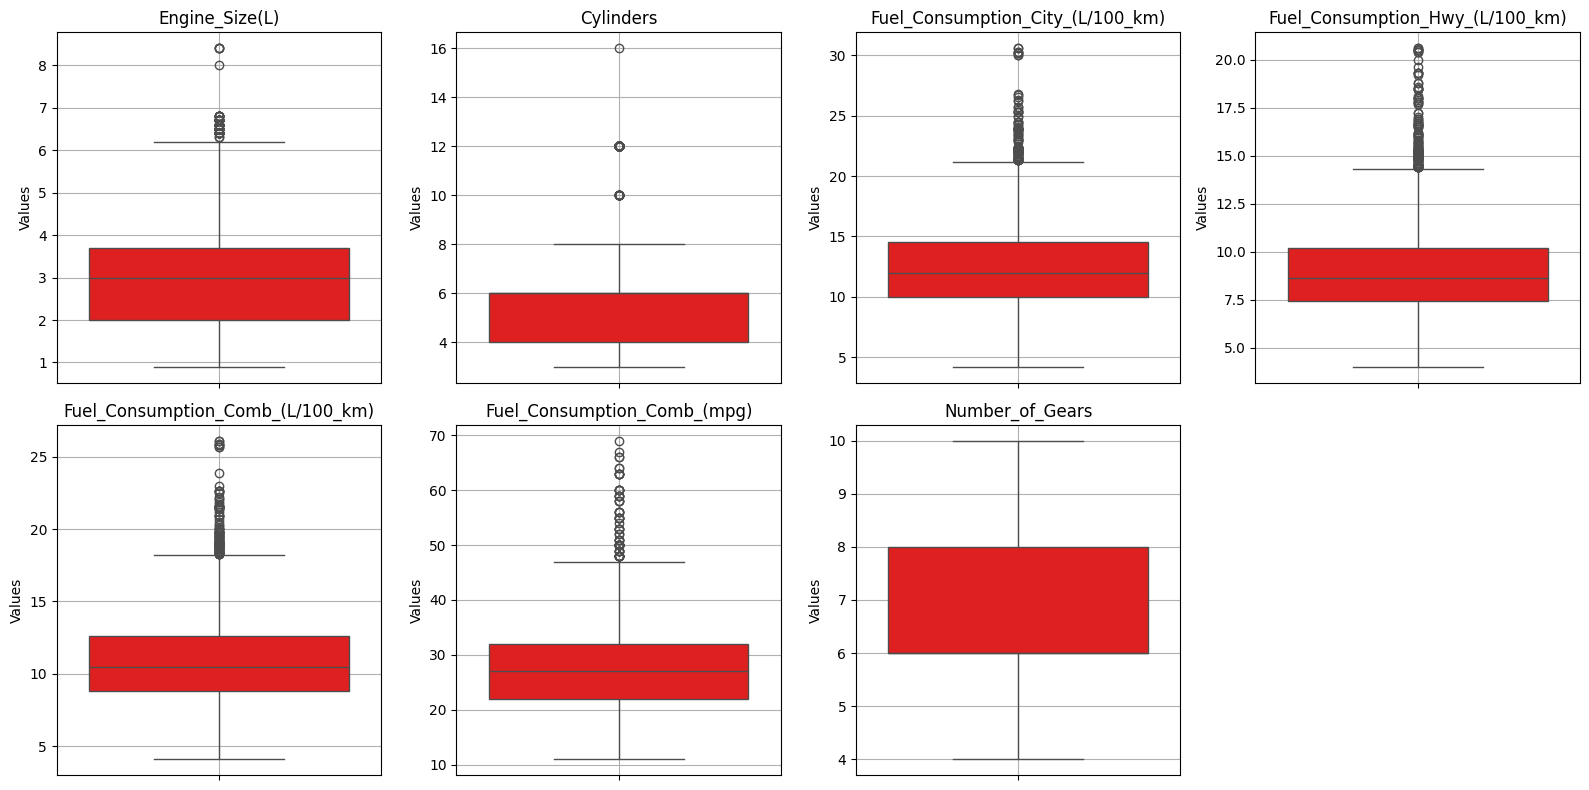

In [22]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns):
    sns.boxplot(data=df[column], ax=axes[index], color='red')
    axes[index].set_title(column)
    axes[index].set_ylabel('Values')
    axes[index].grid(True)
    
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

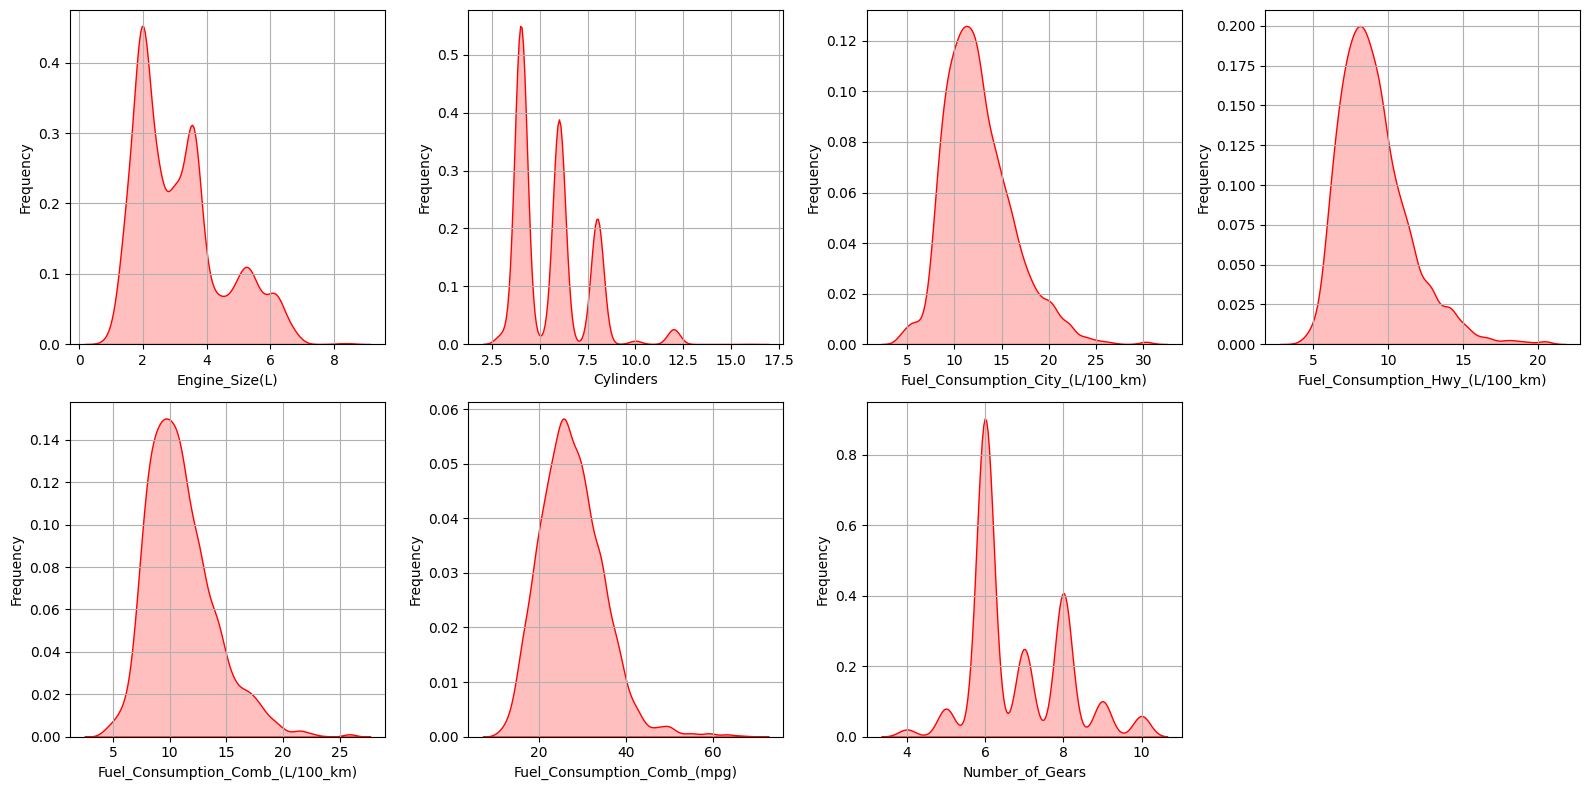

In [23]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns):
    sns.kdeplot(data=df[column], ax=axes[index], color='red', fill=True)
    axes[index].set_ylabel('Frequency')
    axes[index].grid(True)
    
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

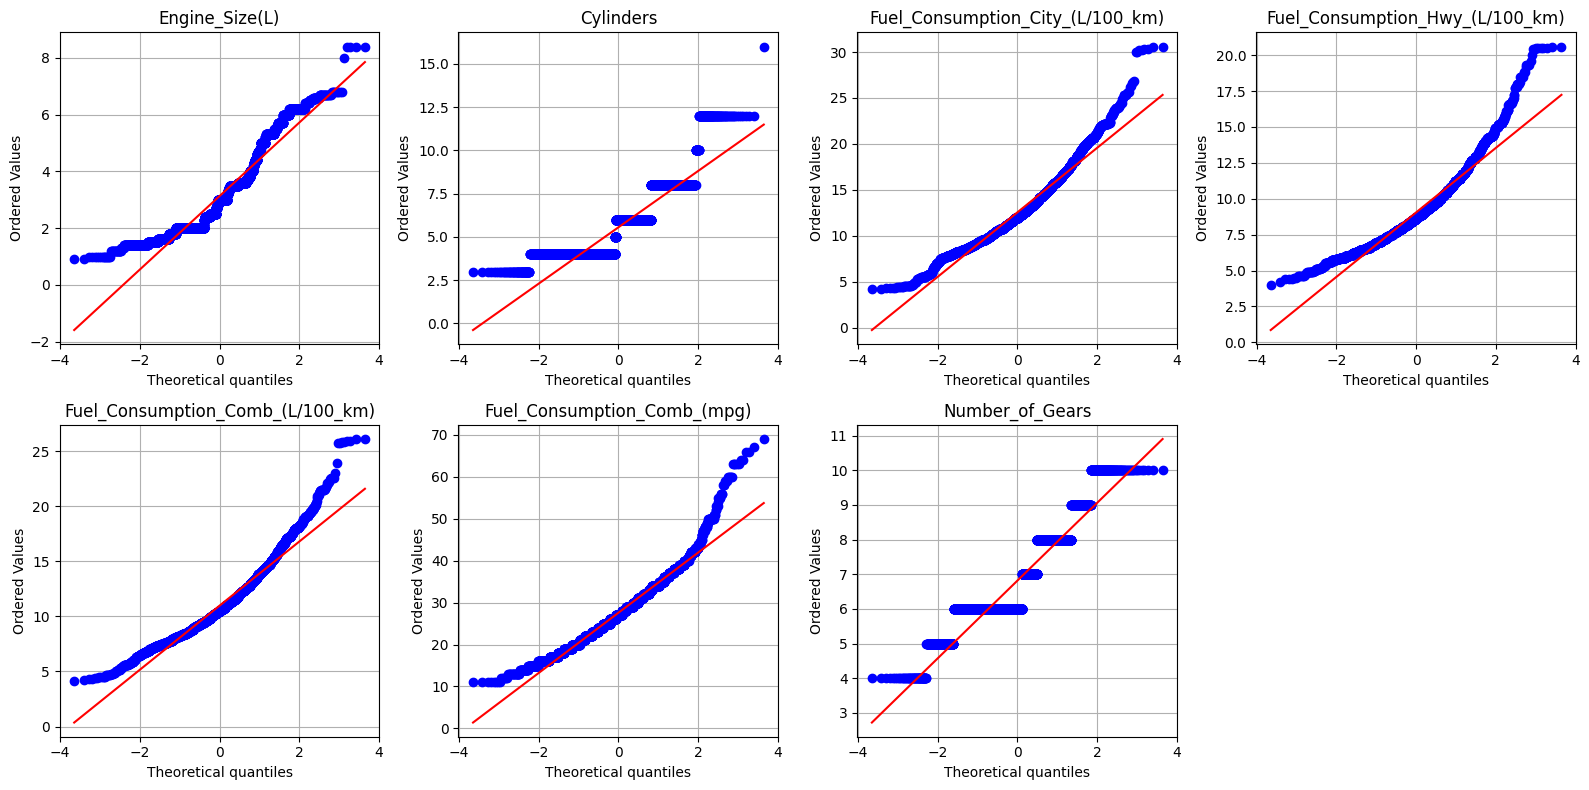

In [24]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns):
    stats.probplot(df[column], dist='norm', plot=axes[index])
    axes[index].set_title(column)
    axes[index].grid(True)
    
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [26]:
df.head()

,Vehicle_Brand,Vehicle_Class,Engine_Size(L),Cylinders,Fuel_Type,Fuel_Consumption_City_(L/100_km),Fuel_Consumption_Hwy_(L/100_km),Fuel_Consumption_Comb_(L/100_km),Fuel_Consumption_Comb_(mpg),Transmission_Type,Number_of_Gears,CO2_Emissions(g/km)
0,0,0,2.0,4,4,9.9,6.7,8.5,33,2,5,196
1,0,0,2.4,4,4,11.2,7.7,9.6,29,4,6,221
2,0,0,1.5,4,4,6.0,5.8,5.9,48,3,7,136
3,0,11,3.5,6,4,12.7,9.1,11.1,25,2,6,255
4,0,11,3.5,6,4,12.1,8.7,10.6,27,2,6,244


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.iloc[:, :11]
Y = df.iloc[:, 11]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

rfr = RandomForestRegressor(random_state=101)
gbr = GradientBoostingRegressor(random_state=101)
abr = AdaBoostRegressor(random_state=101)
xgbr = XGBRegressor(random_state=101)
xgbrfr = XGBRFRegressor(random_state=101)
lgbmr = LGBMRegressor(random_state=101, n_jobs=8, force_col_wise=True)
cbr = CatBoostRegressor(verbose=0, random_state=101)

regressor_model_dict = {
    'RandomForestRegressor' : rfr,
    'GradientBoostingRegressor' : gbr,
    'AdaBoostRegressor' : abr,
    'XGBRegressor' : xgbr,
    'XGBRFRegressor' : xgbrfr,
    'LGBMRegressor' : lgbmr,
    'CatBoostRegressor' : cbr
}

for model_name, model in regressor_model_dict.items():
    print(f'\n----------------- {model_name} -----------------')
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    print('Train R2-Score :', r2_score(Y_train, Y_pred_train))
    print('Test R2-Score :', r2_score(Y_test, Y_pred_test))


----------------- RandomForestRegressor -----------------
Train R2-Score : 0.9991706901242486
Test R2-Score : 0.9969782021819702

----------------- GradientBoostingRegressor -----------------
Train R2-Score : 0.9967460414470304
Test R2-Score : 0.99655884759517

----------------- AdaBoostRegressor -----------------
Train R2-Score : 0.9261704304852547
Test R2-Score : 0.9231010077362376

----------------- XGBRegressor -----------------
Train R2-Score : 0.9991881847381592
Test R2-Score : 0.9974173903465271

----------------- XGBRFRegressor -----------------
Train R2-Score : 0.9963018298149109
Test R2-Score : 0.9952430725097656

----------------- LGBMRegressor -----------------
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 4169, number of used features: 11
[LightGBM] [Info] Start training from score 249.557928
Train R2-Score : 0.9975953172723155
Test R2-Score : 0.9963789929409762

----------------- CatBoostRegressor -----------------
Train R2-Sc

In [29]:
import pickle

with open('Vehicle_CO2_Emission_Predictor_v1.1.pkl', 'wb') as file:
    pickle.dump(cbr, file)
    
with open('Vehicle_CO2_Emission_Predictor_v1.1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
print('R2-Score of Loaded Model :', loaded_model.score(X_test, Y_test))

R2-Score of Loaded Model : 0.9978137051394693
